c.p >200 daily moving avg - long
c.p <200 daily moving avg - short

In [1]:
import nsepy as nse
import matplotlib.pyplot as plt
from datetime import date
import pandas as pd
import numpy as np

name of stock :hdfc


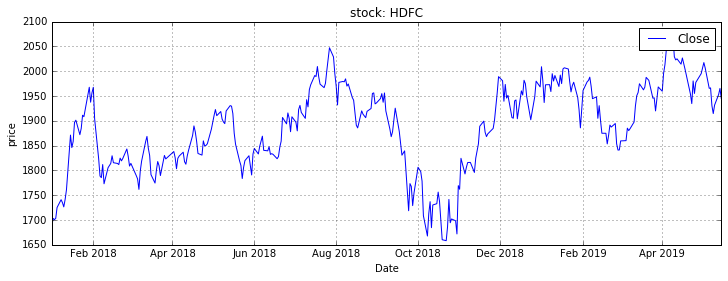

In [2]:
tick=str(raw_input('name of stock :')).upper()
STD=date(2018,1,1)
END=date(2019,5,15)
d=nse.get_history(str(tick),STD,END)
dt=pd.DataFrame(d)

p=dt.Close
p.head()

plt.figure(figsize=(12,4))
plt.xlabel('time')
plt.ylabel('price')

p.plot(color='blue')
plt.legend()
plt.title('stock: {}'.format(tick))
plt.grid()
plt.show()

In [4]:
buyprice=0.0
sellprice=0.0
cash =1
stock =0
sma=200
mawealth =1.0

buy_data=[]
sell_data=[]
trade_price=[]
wealth=[]
used=dt.Close

MA=used.rolling(window=sma,center=False).mean()
N=len(used)


In [5]:
for x in range(sma+1,N):
    if used[x]< MA[x] and cash==1:
        buyprice=used[x]
    
        buy_data.append(buyprice)
        trade_price.append(buyprice)
        cash=0.0
        stock = 1
    elif used[x] > MA[x] and stock ==1:
        sellprice=used[x]
        
        sell_data.append(sellprice)
        trade_price.append(sellprice)
        stock = 0
        cash=1
        mawealth = mawealth*(sellprice/buyprice)
        wealth.append(mawealth)
w=pd.DataFrame(wealth)
wealth


[1.1148160169966657,
 1.1364230407644185,
 1.1483030832194734,
 1.1754983495067093]

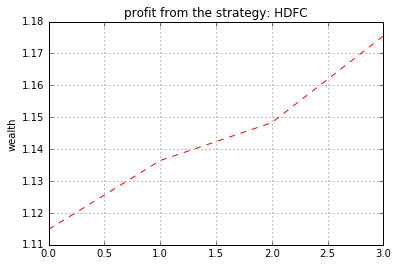

In [6]:
plt.plot(w,'r--')
plt.ylabel('wealth')
plt.title('profit from the strategy: {}'.format(tick))
plt.grid()